# Cartes et statistiques

In [1]:
# import librairies
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Polygon, LineString, Point
from shapely import wkt
import matplotlib.pyplot as plt
import seaborn as sns

# désactiver les avertissements et voir toutes les colonnes
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [2]:
# import données (resultat du notebook précédent)
path = "/home/pa/Documents/M1/memoire/notebooks_donnees_rendu/"
gdf_1898 = geopandas.read_file(path + 'donnees_apres_creation colonnes.csv')

In [3]:
# import des données de quartier
# attention : quartier_paris.shp a besoin des autres fichiers "quartier_paris" dans le même dossier
gdf_quartiers = geopandas.read_file(path +"quartier_paris.shp", encoding='utf-8')

In [4]:
# conversion du type des colonnes de quartiers en entier
gdf_1898.quartier_imm = pd.to_numeric(gdf_1898.quartier_imm, errors='coerce')
gdf_1898.quartier_pers = pd.to_numeric(gdf_1898.quartier_pers, errors='coerce')
gdf_1898.quartier_imm = gdf_1898["quartier_imm"].astype('Int64')
gdf_1898.quartier_pers = gdf_1898["quartier_pers"].astype('Int64')

# Calculs d'indicateurs

## III. 1) Aperçu des immeubles et des quartiers

In [5]:
# on utilise c_qu comme index pour gdf_quartiers
gdf_quartiers = gdf_quartiers.set_index('c_qu')

In [6]:
# on trie les quartiers dans l'ordre croissant
gdf_quartiers = gdf_quartiers.sort_index(axis=0)

In [7]:
# on ne garde que l_qu (nom quartier), c_ar (numéro de l'arrondissement), 
# le périmetre et la surface du quartier, et geometry qui contient
# le polygone du quartier
gdf_quartiers = gdf_quartiers[['l_qu', 'c_ar', 'perimetre',
       'surface', 'geometry']]

In [8]:
# 15 quartiers avec le plus d'immeubles en valeur absolue
gdf_1898["quartier_imm"].value_counts().head(15)

70    3291
56    3165
79    2628
69    2605
80    2602
51    2468
50    2447
57    2426
61    2282
46    2199
43    2129
77    2049
62    2002
68    1992
67    1919
Name: quartier_imm, dtype: Int64

In [9]:
# on regarde comment s'appellent et où se situent les deux premiers quartiers
gdf_quartiers.loc[(gdf_quartiers.index == 70) | (gdf_quartiers.index == 56)]

,l_qu,c_ar,perimetre,surface,geometry
c_qu,,,,,
56.0,Plaisance,14.0,5961.721190,1.784948e+06,"POLYGON ((2.32113 48.83990, 2.32137 48.83978, ..."
70.0,Clignancourt,18.0,6005.520389,1.653715e+06,"POLYGON ((2.35168 48.89139, 2.35145 48.89043, ..."


In [10]:
# carte du nombre d'immeubles par quartier en valeur absolue :

# on commence par créer la nouvelle colonne dans le gdf quartiers
gdf_quartiers['nb_immeubles'] = gdf_1898["quartier_imm"].value_counts().astype(float)

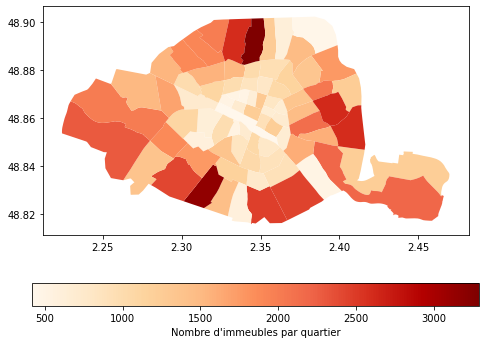

In [11]:
# puis on représente la carte

gdf_quartiers.plot(
    column='nb_immeubles', 
    figsize=(8, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Nombre d'immeubles par quartier", "orientation": "horizontal"}
)

# et on l'enregistre dans un dossier "figures"
plt.savefig(path + 'figures/' + 'carte_nb_imm.jpg', dpi=500)

In [12]:
# on crée une colonne de densité
gdf_quartiers['densite_immeubles'] = gdf_quartiers["nb_immeubles"]/gdf_quartiers['surface']

In [13]:
# on imprime les 15 quartiers les plus denses
gdf_quartiers['densite_immeubles'].sort_values(ascending=False).head(15)

c_qu
8.0     0.004630
12.0    0.003136
2.0     0.003021
14.0    0.002922
13.0    0.002920
5.0     0.002675
3.0     0.002561
77.0    0.002540
9.0     0.002528
10.0    0.002454
20.0    0.002426
21.0    0.002417
7.0     0.002315
33.0    0.002109
35.0    0.002077
Name: densite_immeubles, dtype: float64

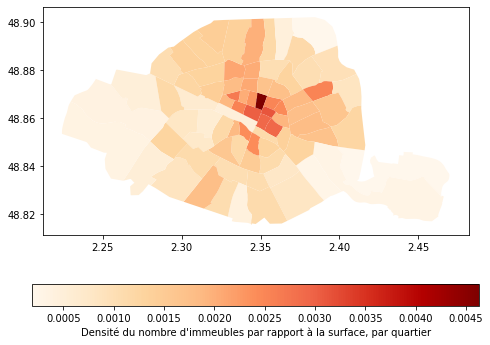

In [14]:
# carte de densité
gdf_quartiers.plot(
    column='densite_immeubles', 
    figsize=(8, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Densité du nombre d'immeubles par rapport à la surface, par quartier", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_densite_imm.jpg', dpi=500)

## III. 2) Les propriétaires, et ceux qui habitent dans un immeuble qu’ils possèdent

In [15]:
# on s'intéresse aux personnes donc on va faire 2 sous-df selon si particulier ou organisation
# ici organisation = colonne org non vide
gdf_org = gdf_1898.loc[(gdf_1898.org != '0')]
gdf_pers = gdf_1898.loc[(gdf_1898.org == '0')]

In [16]:
# qui est a priori bien une partition du df de depart
len(gdf_1898) - len(gdf_org) - len(gdf_pers)

0

In [17]:
round((len(gdf_pers) / len(gdf_1898)) *100, 2)

89.49

In [18]:
# 15 quartiers ou le plus de propriétaires existent
gdf_1898["quartier_pers"].value_counts().head(15)

0     29132
32     2335
31     2034
34     1761
62     1730
33     1619
70     1603
66     1567
64     1472
69     1426
25     1347
61     1327
43     1313
56     1303
65     1291
Name: quartier_pers, dtype: Int64

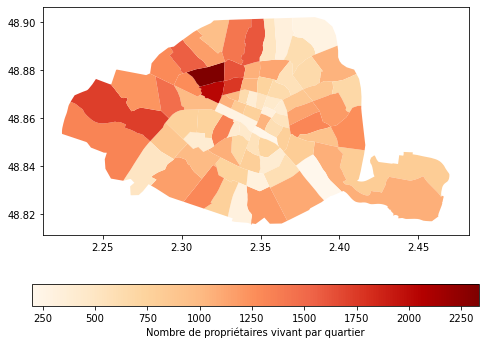

In [19]:
# carte des adresses des propriétaires par quartier

gdf_quartiers['nb_proprietaires'] = gdf_1898["quartier_pers"].value_counts().astype(float)

gdf_quartiers.plot(
    column='nb_proprietaires', 
    figsize=(8, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Nombre de propriétaires vivant par quartier", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_quartiers_pers.jpg', dpi=500)

In [20]:
# dans quels quartiers se trouvent le plus de personnes qui habitent dans leur immeuble ?
# on commence par créer un sous-df
gdf_m_adresse = gdf_pers.loc[gdf_pers.meme_adresse == 'True']

In [21]:
gdf_m_adresse['quartier_pers'].value_counts().head(15)

56    630
79    572
69    559
70    543
80    502
51    501
57    480
75    479
62    437
50    433
61    429
68    421
66    408
32    406
64    394
Name: quartier_pers, dtype: Int64

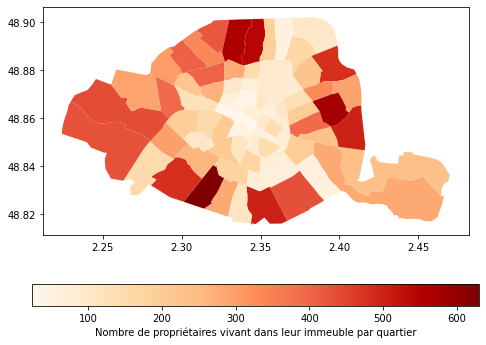

In [22]:
# carte des personnes qui habitent dans leur immeuble
gdf_quartiers['nb_proprietaires_m_adresse'] = gdf_m_adresse['quartier_pers'].value_counts().astype(float)

gdf_quartiers.plot(
    column='nb_proprietaires_m_adresse', 
    figsize=(8, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Nombre de propriétaires vivant dans leur immeuble par quartier", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_quartiers_meme_adresse.jpg', dpi=500)

In [23]:
# on se concentre sur les adresses qui ont bien une information de quartier du propriétaire
gdf_m_quartier = gdf_pers.loc[(gdf_pers.meme_quartier == 'True') & (gdf_pers.quartier_imm != 0)]

In [24]:
# on crée une colonne pour les propriétaires qui habitent dans le même quartier que leur immeuble
gdf_quartiers['nb_proprietaires_m_quartier'] = gdf_m_quartier.quartier_pers.value_counts()

In [25]:
# on crée une autre colonne pour les propriétaires qui habitent dans leur immeuble
gdf_quartiers['densite_proprietaires_m_adresse_pr_imm'] = gdf_quartiers['nb_proprietaires_m_adresse'] / gdf_quartiers['nb_immeubles']
gdf_quartiers.densite_proprietaires_m_adresse_pr_imm = gdf_quartiers.densite_proprietaires_m_adresse_pr_imm.astype(float)

In [26]:
# 15 quartiers avec la plus grande densité de nombre de propriétaires qui habitent dans leur immeuble par rapport au nombre d'immeuble
gdf_quartiers.densite_proprietaires_m_adresse_pr_imm.sort_values(ascending=False).head(15)

c_qu
75.0    0.271542
32.0    0.261429
26.0    0.245223
31.0    0.240975
78.0    0.234776
64.0    0.234663
30.0    0.218750
62.0    0.218282
79.0    0.217656
66.0    0.214963
74.0    0.214912
69.0    0.214587
25.0    0.212371
68.0    0.211345
51.0    0.202998
Name: densite_proprietaires_m_adresse_pr_imm, dtype: float64

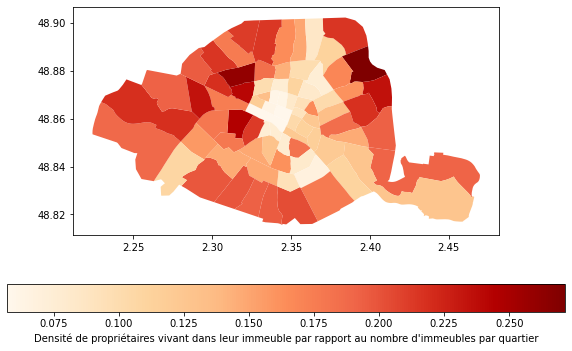

In [27]:
# carte
gdf_quartiers.plot(
    column='densite_proprietaires_m_adresse_pr_imm', 
    figsize=(10, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Densité de propriétaires vivant dans leur immeuble par rapport au nombre d'immeubles par quartier", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_densite_meme_adresse_nb_imm.jpg', dpi=500)

In [28]:
# données + carte : densité des personnes qui habitent dans leur immeuble par rapport au nombre de propriétaires du quartier
gdf_quartiers['densite_proprietaires_m_quartier_pr_proprios'] = gdf_quartiers['nb_proprietaires_m_quartier'] / gdf_quartiers['nb_proprietaires']

gdf_quartiers.densite_proprietaires_m_quartier_pr_proprios = gdf_quartiers.densite_proprietaires_m_quartier_pr_proprios.astype(float)

In [29]:
# 15 premiers quartiers
gdf_quartiers.densite_proprietaires_m_quartier_pr_proprios.sort_values(ascending=False).head(15)

c_qu
51.0    0.811705
80.0    0.806503
79.0    0.750422
56.0    0.733691
57.0    0.708621
50.0    0.699729
78.0    0.695015
77.0    0.693439
68.0    0.681342
61.0    0.678975
75.0    0.677788
60.0    0.651575
69.0    0.636045
59.0    0.627119
76.0    0.623672
Name: densite_proprietaires_m_quartier_pr_proprios, dtype: float64

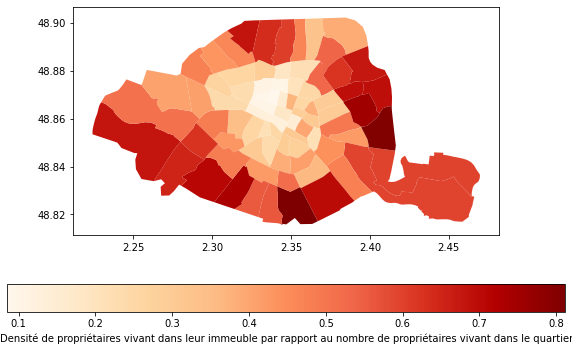

In [30]:
# carte
gdf_quartiers.plot(
    column='densite_proprietaires_m_quartier_pr_proprios', 
    figsize=(10, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Densité de propriétaires vivant dans leur immeuble par rapport au nombre de propriétaires vivant dans le quartier", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_densite_meme_adresse_nb_proprios.jpg', dpi=500)

***

### Où habitent les multi-propriétaires ?

In [31]:
# on fait un sous-dataframe supplémentaire, qui contient les multi-propriétaires
gdf_multi_proprios = gdf_pers.loc[(gdf_pers.code_pers.str.strip() != "") & (gdf_pers.code_pers.str.strip() != "0.0")]

In [32]:
# on commence par enlever les personnes qui ont un code mais ne possèdent qu'un immeuble
# pour ce faire on fait un sous-df qui garde une seule ligne de chaque multi-propriétaire,
gdf_multi_proprios_sans_dupl = gdf_multi_proprios.drop_duplicates(subset=['code_pers'], keep='first')

In [33]:
# puis on ne garde que les colonnes qui nous intéressent
gdf_multi_proprios_sans_dupl = gdf_multi_proprios_sans_dupl[[
    'new_index', 'num_pers', 'type_voie_pers', 'nom_voie_pers',
    'quartier_pers', 'nom_pers', 'prenom_pers', 'civilite_pers',
    'code_pers', 'desamb_pers', 'ville_pers', 'departement_pers',
    'ger', 'coord_pers']]

In [34]:
# on utilise code_pers comme index et on compte le nombre d'immeuble par multi-propriétaire
gdf_multi_proprios_sans_dupl = gdf_multi_proprios_sans_dupl.set_index('code_pers')
gdf_multi_proprios_sans_dupl['nb_imm_possedes'] = gdf_multi_proprios.code_pers.value_counts()

In [35]:
# on peut maintenant enlever les personnes avec un seul immeuble des deux sous-dataframes
gdf_multi_proprios_sans_dupl = gdf_multi_proprios_sans_dupl.loc[gdf_multi_proprios_sans_dupl.nb_imm_possedes != 1]
liste_code_pers_ok = gdf_multi_proprios_sans_dupl.index.values.tolist()
gdf_multi_proprios = gdf_multi_proprios.loc[gdf_multi_proprios.code_pers.isin(liste_code_pers_ok)]

In [36]:
# on a désormais deux dataframes qui sont corrects. on peut les utiliser.

In [37]:
total = len(gdf_1898)
pers = len(gdf_pers)
multi_prop = len(gdf_multi_proprios)
pourc_multi_p = round((multi_prop / total)*100, 2)

print(f'Il y a {total} immeubles au total ; dont {pers} environ qui sont possédés par des particuliers ; et {multi_prop} par des multi-propriétaires, ce qui représente {pourc_multi_p} % du total.')

Il y a 104827 immeubles au total ; dont 93807 environ qui sont possédés par des particuliers ; et 35791 par des multi-propriétaires, ce qui représente 34.14 % du total.


In [38]:
total_multi_p = len(gdf_multi_proprios_sans_dupl)

print(f'Il y a {total_multi_p} multi-propriétaires en tout.')

Il y a 11203 multi-propriétaires en tout.


In [39]:
# dans quels quartiers habitent ces multi_propriétaires ?
gdf_multi_proprios_sans_dupl.quartier_pers.value_counts().head(15)

32    413
31    336
62    318
33    257
64    245
80    233
66    232
34    227
61    224
56    223
43    216
25    215
70    213
79    201
57    198
Name: quartier_pers, dtype: Int64

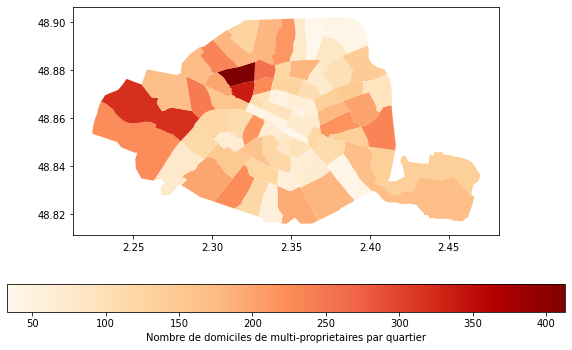

In [40]:
# carte
gdf_quartiers['nb_domiciles_multi_proprios'] = gdf_multi_proprios_sans_dupl.quartier_pers.value_counts().astype(float)

gdf_quartiers.plot(
    column='nb_domiciles_multi_proprios', 
    figsize=(10, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Nombre de domiciles de multi-proprietaires par quartier", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_nb_domicile_multi_propr_p_quartier.jpg', dpi=500)

In [41]:
# quel est le premier quartier ?
gdf_quartiers.loc[(gdf_quartiers.index == 32)][['l_qu', 'c_ar']]

,l_qu,c_ar
c_qu,,
32.0,Europe,8.0


In [42]:
# dans quels quartiers ces multi-propriétaires possèdent des immeubles ?
gdf_multi_proprios.quartier_imm.value_counts().head(15)

50    1074
70    1047
51    1018
61    1013
56     972
80     919
62     909
57     890
79     878
69     852
46     822
43     814
59     764
58     738
73     685
Name: quartier_imm, dtype: Int64

In [43]:
# colonne
gdf_quartiers['nb_imm_de_multi_proprios'] = gdf_multi_proprios.quartier_imm.value_counts().astype(float)

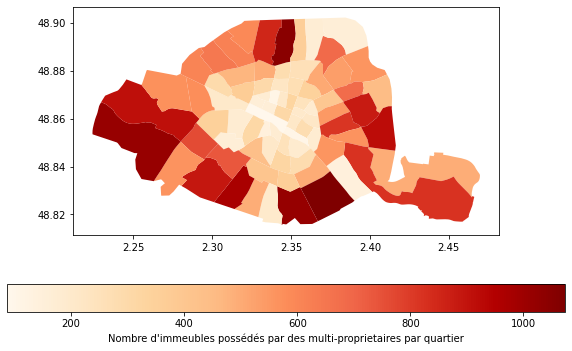

In [44]:
# carte
gdf_quartiers.plot(
    column='nb_imm_de_multi_proprios', 
    figsize=(10, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Nombre d'immeubles possédés par des multi-proprietaires par quartier", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_multi_nb_imm_possedes.jpg', dpi=500)

In [45]:
# densité d'immeubles possédés par des multi-propriétaires par rapport au nombre d'immeubles
gdf_quartiers['densite_imm_multi_sur_total'] = gdf_quartiers.nb_imm_de_multi_proprios / gdf_quartiers.nb_immeubles

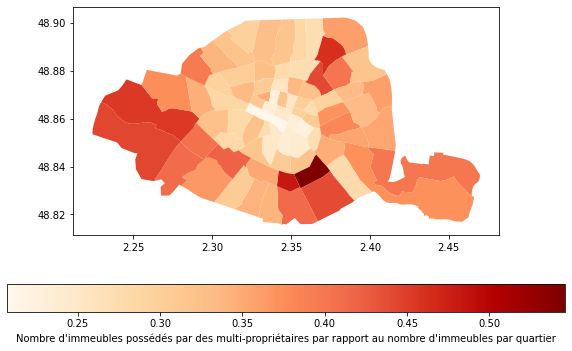

In [46]:
# carte
gdf_quartiers.plot(
    column='densite_imm_multi_sur_total', 
    figsize=(10, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Nombre d'immeubles possédés par des multi-propriétaires par rapport au nombre d'immeubles par quartier", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_nb_multi_propr_pr_total.jpg', dpi=500)

In [47]:
nb_imm_moyen = round(len(gdf_multi_proprios) / len(gdf_multi_proprios_sans_dupl), 2)
print(f"Il y a {nb_imm_moyen} immeubles par multi-proprietaire en moyenne")

Il y a 3.19 immeubles par multi-proprietaire en moyenne


In [48]:
# je m'intéresse a cette distribution

In [49]:
gdf_multi_proprios_sans_dupl.nb_imm_possedes.describe()

count    11203.000000
mean         3.194769
std          3.434507
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max        107.000000
Name: nb_imm_possedes, dtype: float64

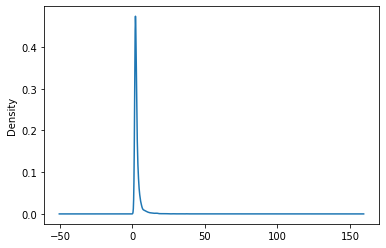

In [50]:
# graphique
gdf_multi_proprios_sans_dupl['nb_imm_possedes'].plot(kind='kde')

plt.savefig(path + 'figures/' + 'graph_nb_immeubles.jpg', dpi=300)

In [51]:
# quel est le neuvième décile ?
gdf_multi_proprios_sans_dupl.nb_imm_possedes.quantile(0.90)

5.0

In [52]:
# combien les Pereire possèdent d'immeubles ?
gdf_multi_proprios_sans_dupl.loc[gdf_multi_proprios_sans_dupl.nom_pers == 'Pereire'][['num_pers', 'type_voie_pers', 'nom_voie_pers', 'quartier_pers', 'nom_pers', 'prenom_pers', 'civilite_pers', 'ville_pers', 'departement_pers', 'nb_imm_possedes']]

,num_pers,type_voie_pers,nom_voie_pers,quartier_pers,nom_pers,prenom_pers,civilite_pers,ville_pers,departement_pers,nb_imm_possedes
code_pers,,,,,,,,,,
9733.0,82,avenue,villiers,66,Pereire,0,0,Paris,0,75
9736.0,82,avenue,villiers,66,Pereire,0,Mme,Paris,0,2
9734.0,33,boulevard,courcelles,32,Pereire,H.,0,Paris,0,2
9735.0,45,rue du faubourg,st-honore,31,Pereire,Eug,0,Paris,0,2


In [53]:
# les 15 personnes qui possèdent le plus d'immeubles
gdf_multi_proprios_sans_dupl = gdf_multi_proprios_sans_dupl.sort_values(by='nb_imm_possedes', ascending=False)
gdf_multi_proprios_sans_dupl.head(15)[['nom_pers', 'prenom_pers', 'civilite_pers', 'quartier_pers', 'ville_pers', 'nb_imm_possedes']]

,nom_pers,prenom_pers,civilite_pers,quartier_pers,ville_pers,nb_imm_possedes
code_pers,,,,,,
41406.0,Allez,0,Vve,65,Paris,107
14891.0,Madre (de),0,0,40,Paris,101
9733.0,Pereire,0,0,66,Paris,75
5603.0,Rombeau,0,Mme,<NA>,Paris,63
2895.0,Tandou,0,Hiers,30,Paris,58
39991.0,Bariquand,0,0,15,Paris,56
4236.0,Say,0,0,<NA>,Paris,54
21372.0,Hérouard,0,0,80,Paris,54
33280.0,Chéron,0,0,58,Paris,52


In [54]:
# combien de multi-propriétaires ça concerne ?
pourc_multi_p = round((15/len(gdf_multi_proprios_sans_dupl))*100, 2)
print(f"Cela concerne {pourc_multi_p} % de multi-propriétaires")

Cela concerne 0.13 % de multi-propriétaires


In [55]:
nb_veuves = len(gdf_multi_proprios_sans_dupl.loc[gdf_multi_proprios_sans_dupl.civilite_pers == "Vve"])
total_multi_p = len(gdf_multi_proprios_sans_dupl)
pourc_veuves = round((nb_veuves/total_multi_p)*100, 2)

print(f"On trouve {nb_veuves} veuves multi-propriétaires, ce qui représente {pourc_veuves} % de tous les multi-propriétaires.")

On trouve 1219 veuves multi-propriétaires, ce qui représente 10.88 % de tous les multi-propriétaires.


***
## on s'intéresse plus en profondeur à deux quartiers :
- Plaisance (quartier 56, 14e)
- Clignancourt (quartier 70, 18e)

In [56]:
gdf_plaisance = gdf_multi_proprios_sans_dupl.loc[gdf_multi_proprios_sans_dupl.quartier_pers == 56]
gdf_clignancourt = gdf_multi_proprios_sans_dupl.loc[gdf_multi_proprios_sans_dupl.quartier_pers == 70]

In [57]:
# statistiques Plaisance
gdf_plaisance.describe()

,quartier_pers,nb_imm_possedes
count,223.0,223.000000
mean,56.0,2.627803
std,0.0,1.342493
min,56.0,2.000000
25%,56.0,2.000000
50%,56.0,2.000000
75%,56.0,3.000000
max,56.0,13.000000


In [58]:
# statistiques Clignancourt
gdf_clignancourt.describe()

,quartier_pers,nb_imm_possedes
count,213.0,213.000000
mean,70.0,3.582160
std,0.0,4.543195
min,70.0,2.000000
25%,70.0,2.000000
50%,70.0,2.000000
75%,70.0,3.000000
max,70.0,40.000000


In [59]:
print(f"Le quartier de Plaisance comporte {len(gdf_plaisance)} multi-propriétaires, et le quartier de Clignancourt {len(gdf_clignancourt)}.")

Le quartier de Plaisance comporte 223 multi-propriétaires, et le quartier de Clignancourt 213.


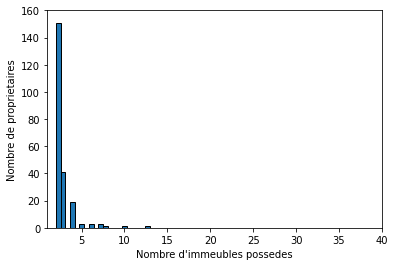

In [60]:
# graphique sur la distribution du nombre d'immeubles par multi-propriétaire qui habitent à Plaisance
gdf_plaisance['nb_imm_possedes'].plot(kind='hist', bins=20, edgecolor='black')

plt.xlabel("Nombre d'immeubles possedes")
plt.ylabel("Nombre de proprietaires")

plt.xlim([1, 40])
plt.ylim([0, 160])

plt.savefig(path + 'figures/' + 'graph_plaisance.jpg', dpi=300)

plt.show()

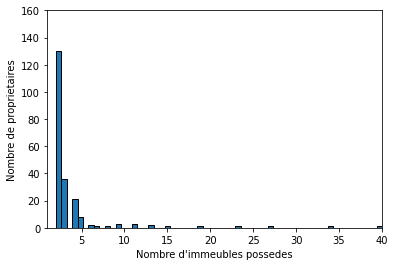

In [61]:
# graphique sur la distribution du nombre d'immeubles par multi-propriétaire qui habitent à Clignancourt
gdf_clignancourt['nb_imm_possedes'].plot(kind='hist', bins=60, edgecolor='black')

plt.xlabel("Nombre d'immeubles possedes")
plt.ylabel("Nombre de proprietaires")

plt.xlim([1, 40])
plt.ylim([0, 160])


plt.savefig(path + 'figures/' + 'graph_clignancourt.jpg', dpi=300)

plt.show()

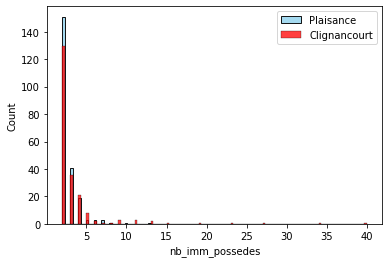

<Figure size 720x360 with 0 Axes>

In [62]:
# ces deux graphiques sur la même figure
figure = plt.figure()

sns.histplot(data=gdf_plaisance, x="nb_imm_possedes", color="skyblue", label="Plaisance")
sns.histplot(data=gdf_clignancourt, x="nb_imm_possedes", color="red", label="Clignancourt")

plt.legend() 
plt.figure(figsize=(10,5))

plt.show()

figure.savefig(path + 'figures/' + 'graph_56_70.jpg', dpi=300)

In [63]:
# je récupère l'information : les adresses et quartiers des immeubles
# possédés par des multipropriétaires habitant à Plaisance
# et à Clignancourt

gdf_plaisance_av_dupl = gdf_multi_proprios.loc[gdf_multi_proprios.quartier_pers == 56]
gdf_clignancourt_av_dupl = gdf_multi_proprios.loc[gdf_multi_proprios.quartier_pers == 70]

In [64]:
# je regarde dans quels quartiers se trouvent les immeubles possédés
# par les multipropriétaires habitant à Plaisance
gdf_plaisance_av_dupl.quartier_imm.value_counts().head(10)

56    421
57     36
55     14
76     13
58     11
60      8
45      8
51      6
42      5
77      5
Name: quartier_imm, dtype: Int64

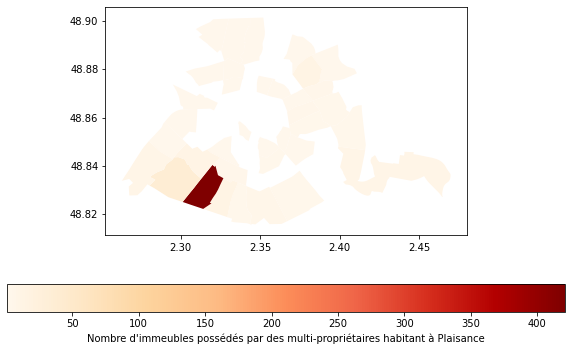

In [65]:
# carte
gdf_quartiers['plaisance'] = gdf_plaisance_av_dupl.quartier_imm.value_counts().astype(float)

gdf_quartiers.plot(
    column='plaisance', 
    figsize=(10, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Nombre d'immeubles possédés par des multi-propriétaires habitant à Plaisance", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_nb_multi_plaisance.jpg', dpi=500)

In [66]:
# je regarde dans quels quartiers se trouvent les immeubles possédés
# par les multipropriétaires habitant à Clignancourt
gdf_clignancourt_av_dupl.quartier_imm.value_counts().head(10)

70    470
69     86
71     38
68     15
37     13
75     10
76      8
57      7
77      7
50      6
Name: quartier_imm, dtype: Int64

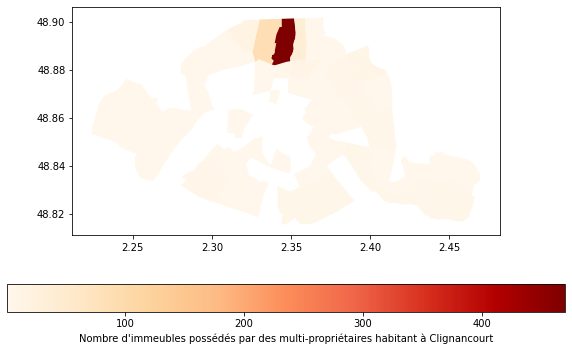

In [67]:
# carte
gdf_quartiers['clignancourt'] = gdf_clignancourt_av_dupl.quartier_imm.value_counts().astype(float)
gdf_quartiers.plot(
    column='clignancourt', 
    figsize=(10, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Nombre d'immeubles possédés par des multi-propriétaires habitant à Clignancourt", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_nb_multi_clignancourt.jpg', dpi=500)

In [68]:
## idem avec Europe
# statistiques
gdf_europe_av_dupl = gdf_multi_proprios.loc[gdf_multi_proprios.quartier_pers == 32]
gdf_europe_av_dupl.quartier_imm.value_counts().head(10)

32    277
67     49
59     43
66     40
62     36
69     34
42     33
38     27
61     26
34     26
Name: quartier_imm, dtype: Int64

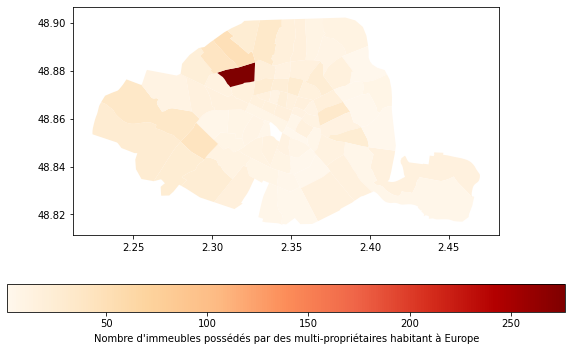

In [69]:
# carte
gdf_quartiers['europe'] = gdf_europe_av_dupl.quartier_imm.value_counts().astype(float)

gdf_quartiers.plot(
    column='europe', 
    figsize=(10, 6),
    cmap='OrRd',
    legend=True,
    legend_kwds={"label": "Nombre d'immeubles possédés par des multi-propriétaires habitant à Europe", "orientation": "horizontal"}
)

plt.savefig(path + 'figures/' + 'carte_nb_multi_europe.jpg', dpi=500)

***

## Données sur les non-parisiens

In [70]:
# pourcents propriétaires non parisiens
# 1. sur toutes les données
gdf_non_parisiens = gdf_1898.loc[(gdf_1898.ville_pers != 'Paris') & (gdf_1898.ville_pers != '0')]

total_tout = len(gdf_1898)
nb_non_parisiens = len(gdf_non_parisiens)
pourcent_non_parisiens_s_total = round((nb_non_parisiens / total_tout)*100, 2)
print(f"Il y a {nb_non_parisiens} adresses qui appartiennent à des personnes qui n'habitent pas à Paris, c'est-à-dire {pourcent_non_parisiens_s_total} % du total des adresses.")

Il y a 11164 adresses qui appartiennent à des personnes qui n'habitent pas à Paris, c'est-à-dire 10.65 % du total des adresses.


In [71]:
# 2. sur les propriétaires particuliers uniquement
total_pers = len(gdf_pers)
nb_non_parisiens = len(gdf_non_parisiens)
pourcent_non_parisiens_s_pers = round((nb_non_parisiens / total_pers)*100, 2)
print(f"Il y a {nb_non_parisiens} adresses qui appartiennent à des personnes qui n'habitent pas à Paris, c'est-à-dire {pourcent_non_parisiens_s_pers} % du total des propriétaires particuliers.")

Il y a 11164 adresses qui appartiennent à des personnes qui n'habitent pas à Paris, c'est-à-dire 11.9 % du total des propriétaires particuliers.


In [72]:
gdf_non_parisiens.ville_pers.value_counts().head(25)

Neuilly s/Seine        499
St-Mandé               334
Vincennes              290
Versailles             233
Montreuil-sous-Bois    181
Asnières               174
Boulogne s/Seine       172
Charenton              171
Bagnolet               143
Montrouge              127
Fontenay s/Bois        125
Levallois              118
Nogent-sur-Marne       113
Ivry s/S.              104
St-Maurice              91
Parc-St-Maur            89
Clamart                 86
St-Denis                80
Bois-Colombes           77
St-Ouen                 72
Rueil                   67
Argenteuil              67
St-Cloud                66
Pantin                  65
St-Germain-en-Laye      63
Name: ville_pers, dtype: int64

In [73]:
gdf_non_parisiens.departement_pers.value_counts().head(20)

Seine               5036
Seine-et-Oise       2411
Seine-et-Marne       615
Oise                 345
Eure                 184
Yonne                156
Loiret               132
Aisne                122
Eure-et-Loir         103
Somme                 99
0                     96
Nord                  76
Marne                 75
Seine-Inférieure      74
Orne                  69
Calvados              63
Sarthe                53
Côte-d’Or             48
Gironde               45
Loir-et-Cher          44
Name: departement_pers, dtype: int64

In [74]:
# quelles sont les 10 organisations qui possèdent le plus d'immeubles ?
gdf_org['org_hom'] = gdf_org['org_hom'].str.replace('Assistance Publique','Assistance publique')
gdf_org["org_hom"].value_counts().head(10)

Ville de Paris                 2775
Assistance publique             534
Chemin de fer de l’Est          363
Cie Gale du gaz                 325
Etat                            301
Sté des Immeubles de France     271
Chemin de fer d’Orléans         205
Cie des Omnibus                 167
Chemin de fer de l’Ouest        145
Foncière Lyonnaise              134
Name: org_hom, dtype: int64

***
### Statistiques sur les Entrées

In [75]:
# combien d'immeubles sont concernés ?
gdf_1898.entree_imm.str.match('Entrée').value_counts()

False    88186
True     16641
Name: entree_imm, dtype: int64

In [76]:
# cela représente quel pourcentage d'immeubles ?
round(gdf_1898.entree_imm.str.match('Entrée').value_counts()[True]/len(gdf_1898)*100, 2)

15.87

***